# Hochschule Bonn-Rhein-Sieg

# Learning and Adaptivity, SS18

# Assignment 08 (24-June-2018)

##  Sathiya Ramesh, Pradheep Krishna Muthukrishnan Padmanabhan, Naresh Kumar Gurulingan

In [14]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import pickle
import numpy as np
import matplotlib.pyplot as plt

### 1.- Get the MNIST dataset, select one kind of model and train multiple instances of the same model in this dataset (say, from 1 to 100).

1. We are fetching the MNIST dataset using the "fetch_mldata" sklearn API. 
2. The dataset is split into training and test sets using "train_test_split" from sklearn.
3. Our selected model is a DecisionTree.
4. We are directly training ensembles of DecisionTrees using "RandomForestClassifier" from sklearn.

In [8]:
mnist = fetch_mldata('MNIST original')
x_train, x_test, y_train, y_test = train_test_split(mnist.data, 
                                                    mnist.target, 
                                                    test_size=0.4, 
                                                    random_state=0)

### 2.- With the trained models, make ensembles of [2, 3, ..., 100] members, evaluate the testing accuracy of each ensemble, and estimate the uncertainty of their outputs using a histogram or average of softmax outputs (depending on the model).

**Training of RandomForestClassifier with number of ensembles from 2 to 100:**

In [12]:
accuracy = []
num_estimators = np.arange(2, 101, 1)
randomForestClfs = []

for n_est in num_estimators:
    print('-------------------------------------------------------------------------------------------\n')
    print("Number of decision trees in the random forest ensemble = ", n_est)
    randomForest = RandomForestClassifier(n_estimators = n_est, n_jobs = -1, warm_start = True)
    randomForest.fit(x_train, y_train)
    predictions = randomForest.predict(x_test)
    randomForestClfs.append(randomForest)
    acc = accuracy_score(y_test, predictions)
    print("Corresponding accuracy on the test set = ", acc)
    accuracy.append(acc)

-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  2
Corresponding accuracy on the test set =  0.8064285714285714
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  3
Corresponding accuracy on the test set =  0.8699285714285714
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  4
Corresponding accuracy on the test set =  0.8975
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  5
Corresponding accuracy on the test set =  0.9128214285714286
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  6
Cor

Corresponding accuracy on the test set =  0.9631071428571428
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  41
Corresponding accuracy on the test set =  0.9627142857142857
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  42
Corresponding accuracy on the test set =  0.9630714285714286
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  43
Corresponding accuracy on the test set =  0.9615
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  44
Corresponding accuracy on the test set =  0.9636071428571429
-------------------------------------------------------------------------------------------

Corresponding accuracy on the test set =  0.9648928571428571
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  80
Corresponding accuracy on the test set =  0.9649642857142857
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  81
Corresponding accuracy on the test set =  0.9653571428571428
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  82
Corresponding accuracy on the test set =  0.96575
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  83
Corresponding accuracy on the test set =  0.9653571428571428
------------------------------------------------------------------------------------------

### Estimation of uncertainty:

**First we select an image to analyze the uncertainties produced by different ensembles:**

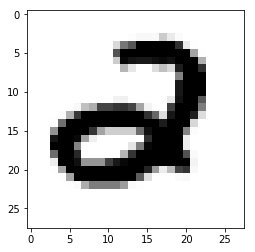

In [47]:
selected_img_idx = 200
selected_image = x_test[selected_img_idx].reshape(1, -1)
selected_class = y_test[selected_img_idx]
plt.imshow(selected_image.reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**We then fetch the uncertainties produced by each ensemble for the selected image:**

In [65]:
uncertainties = []
for clf in randomForestClfs:
    uncertainties.append(clf.predict_proba(selected_image).reshape(-1))

**We then plot histograms of uncertainties produced by ensembles whose number of estimators is a multiple of 20**

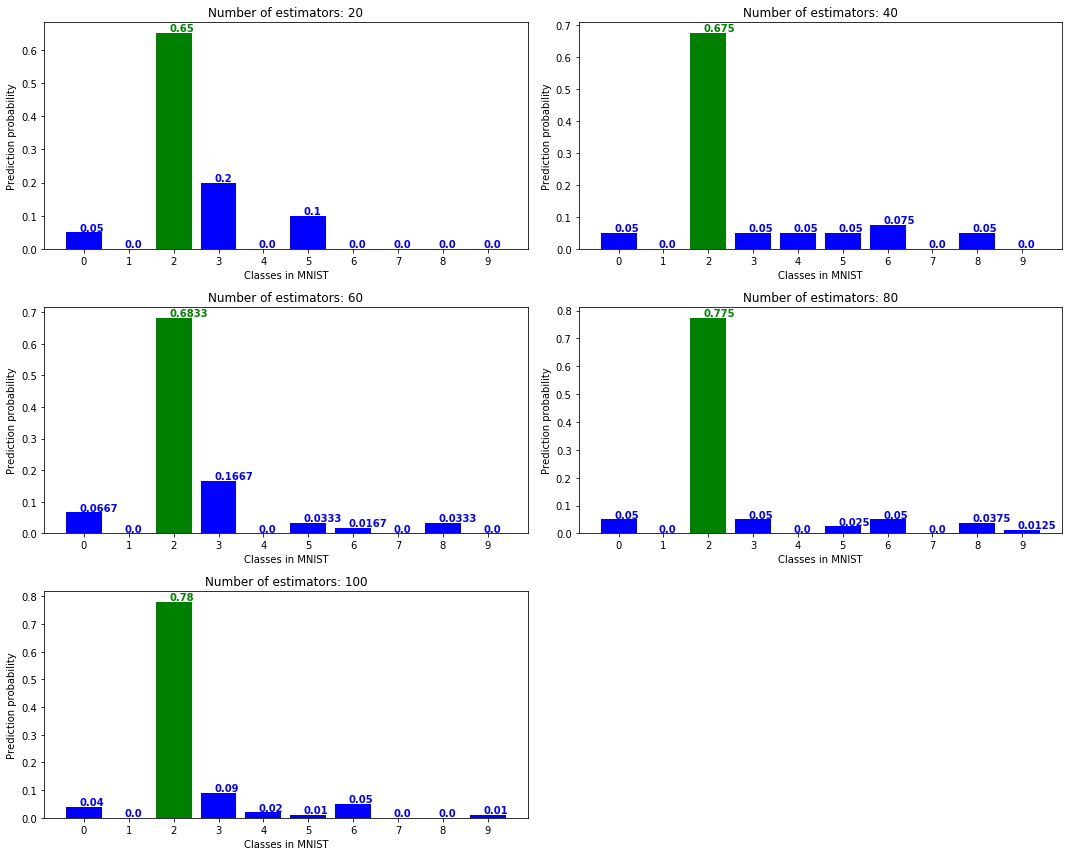

In [66]:
# 0th index has 2 estimators, 18th index will have 20...
clf_indicies = np.arange(18, 99, 20)
classes = np.arange(0, 10, 1)
colors = ['g' if i == selected_class else 'b' for i in range(10)]
figure = plt.figure(figsize=(15, 12))

for en_count, index in enumerate(clf_indicies):
    figure.add_subplot(3, 2, en_count+1)
    plt.bar(classes, uncertainties[index], color=colors)
    plt.xlabel('Classes in MNIST')
    plt.ylabel('Prediction probability')
    plt.title('Number of estimators: {}'.format(index+2))
    plt.tight_layout()
    plt.xticks(classes)
    
    for cls, uncert in enumerate(uncertainties[index]):
        plt.text(cls-0.1, uncert+0.005, str(round(uncert, 4)), 
                 color=colors[cls], fontweight='bold')
    
plt.show()

### 3.- Does accuracy and uncertainty improve by having more members in each ensemble?

**Comments on uncertainty:**

1. All the selected ensembles result in highest probabilities for the correct class highlighted in green.
2. Probabilities of correct class also progressively increases with increase in number of estimators. This is evident as 0.65 < 0.675 < 0.6833 < 0.775 < 0.78 for number of estimators in (20, 40, 60, 80, 100).
3. However, there seems to be no pattern in the distribution of probabilities to the wrong classes.

**Comments on accuracy:**

In [82]:
rate_of_change = np.zeros(len(accuracy))
for index in range(1, len(accuracy)):
    rate_of_change[index] = (accuracy[index] - 
                                  accuracy[index-1])/accuracy[index-1]

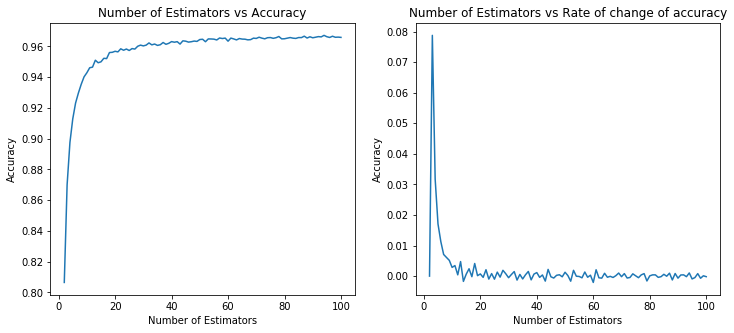

In [89]:
figure = plt.figure(figsize=(12, 5))

figure.add_subplot(1, 2, 1)
plt.plot(num_estimators, accuracy)
plt.title('Number of Estimators vs Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
figure.add_subplot(1, 2, 2)
plt.plot(num_estimators, rate_of_change)
plt.title('Number of Estimators vs Rate of change of accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

1. Accuracy increases with increase in number of estimators.
2. However, the rate of increase slows down as more number of estimators are added and almost stagnates after a certain number of estimators. 

### 4.- Using a single ensemble of your choosing (you define the number of members), find the misclassified examples in the test set and analyze the uncertainty of those examples. Can the uncertainty explain why those examples are misclassified? Give examples and a complete analysis. 

**Choosing an ensemble:**

We choose the ensemble which achieves the highest accuracy on the test set.

In [93]:
accuracy = np.asarray(accuracy)
idx_highest_acc = np.argmax(accuracy, axis=0)
selected_ensemble = randomForestClfs[idx_highest_acc]

print ('Accuracy achieved by the selected ensemble on the test set = ', accuracy[idx_highest_acc])
print ('Number of estimators in the selected ensemble = ', selected_ensemble.n_estimators)

Accuracy achieved by the selected ensemble on the test set =  0.9671785714285714
Number of estimators in the selected ensemble =  94


**Fetching misclassified examples and their uncertainties:**

In [173]:
predictions = selected_ensemble.predict(x_test)
predicted_results = np.equal(predictions, y_test)
misclassified_indices = np.argwhere(predicted_results==0).reshape(-1)
misclassified_examples = x_test[misclassified_indices,:]
misclass_ex_labels = y_test[misclassified_indices]
uncertainties = selected_ensemble.predict_proba(misclassified_examples)

print ('Number of misclassified examples = ', len(misclassified_examples))

Number of misclassified examples =  919


**Analysing misclassified examples:**

In [182]:
np.random.seed(0)
classes = np.arange(0, 10, 1)
num_imgs_to_analyze = 5
few_random_img_idx = [684, 559, 629, 192, 835]

In [183]:
def plot_img_uncertainty(img, label_val, uncertainty):
    
    incorrect_class = np.argmax(uncertainty)
    colors = ['g' if i == label_val else 'b' for i in range(10)]
    colors[incorrect_class] = 'r'
    figure = plt.figure(figsize=(15, 5))
    
    figure.add_subplot(1, 2, 1)
    plt.title('Image of {}'.format(int(label_val)))
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    
    figure.add_subplot(1, 2, 2)
    plt.bar(classes, uncertainty, color=colors)
    plt.xlabel('Classes in MNIST')
    plt.ylabel('Prediction probability')
    plt.title('Number of estimators: {}'.format(selected_ensemble.n_estimators))
    plt.tight_layout()
    plt.xticks(classes)

    for cls, uncert in enumerate(uncertainty):
        plt.text(cls-0.1, uncert+0.005, str(round(uncert, 3)), 
                 color=colors[cls], fontweight='bold')

    plt.show()

Image 1: In the following misclassified image, 2 is predicted as 8. However, the probability of prediction is low and is only 0.383. The misclassification is likely because the image also does look like an 8.

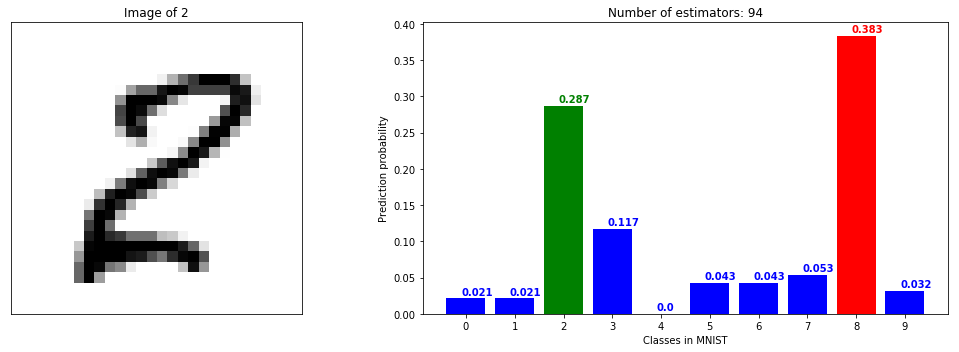

In [184]:
index = few_random_img_idx[0]
plot_img_uncertainty(misclassified_examples[index], 
                     misclass_ex_labels[index], uncertainties[index])

Image 2: In the following misclassified image, 9 is predicted as 0. The probability of prediction in this case is also low (0.394). An tilted ellipse has of sort of tail to it which makes it a 9. However, it is easy to confuse with 0 as the tail is very short.

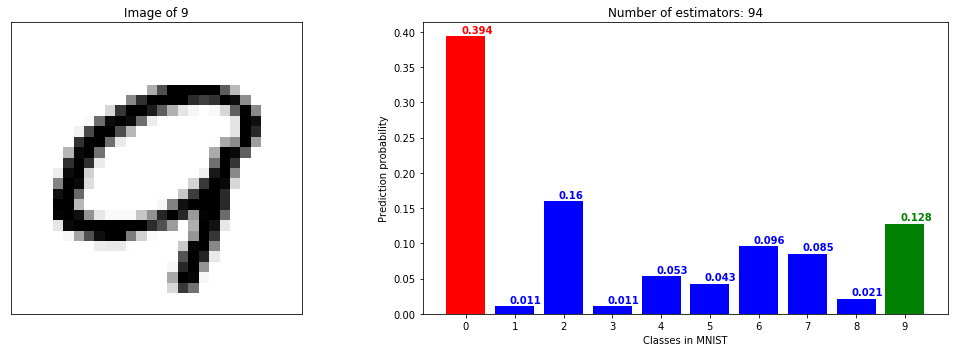

In [185]:
index = few_random_img_idx[1]
plot_img_uncertainty(misclassified_examples[index], 
                     misclass_ex_labels[index], uncertainties[index])

Image 3: In the following misclassified image, 2 is predicted as 0. In this case however, the predicted probability is comparitively high and is over 0.5. This is also reasonable, as the image looks rather similar to 0 than 2. Except for the middle line cutting across the circle, the image is a perfect 0.

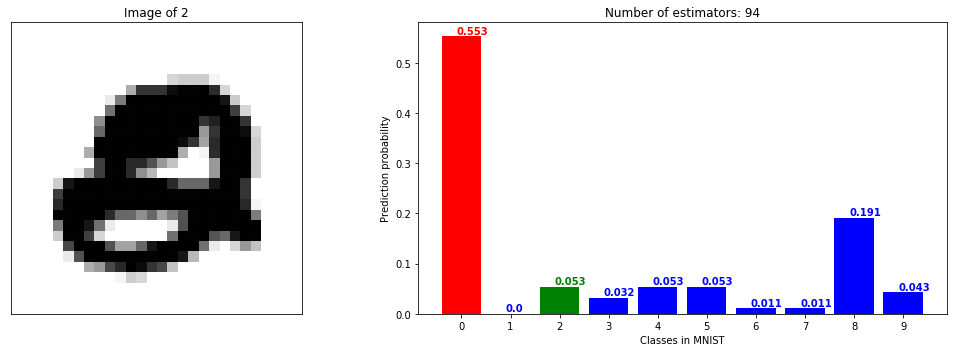

In [186]:
index = few_random_img_idx[2]
plot_img_uncertainty(misclassified_examples[index], 
                     misclass_ex_labels[index], uncertainties[index])

Image 4: In the following misclassified image, 5 is misclassified as 6. This is again reasonable as the semi circle at the lower part of 5 is rather inbetween a circle and a semi-circle in the image. A semi circle would make it a 5 and a circle would make it a 6.

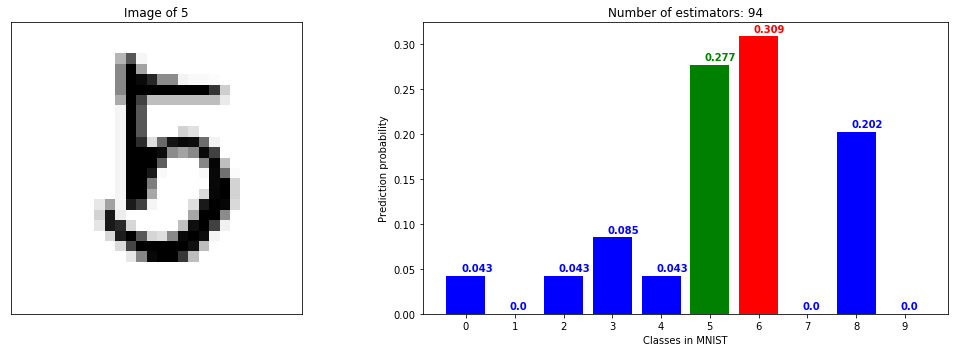

In [187]:
index = few_random_img_idx[3]
plot_img_uncertainty(misclassified_examples[index], 
                     misclass_ex_labels[index], uncertainties[index])

Image 5: In the following misclassified image, 3 is misclassified as 8. The middle line in a regular 3 would be horizontal. However, in this image the middle line is inclined. This inclined middle line almost joins with the lower curve making it similar to 8. In a way, without the lower curve, the upper part does look like a 2 which would explain the higher probability of 2 than for 3.

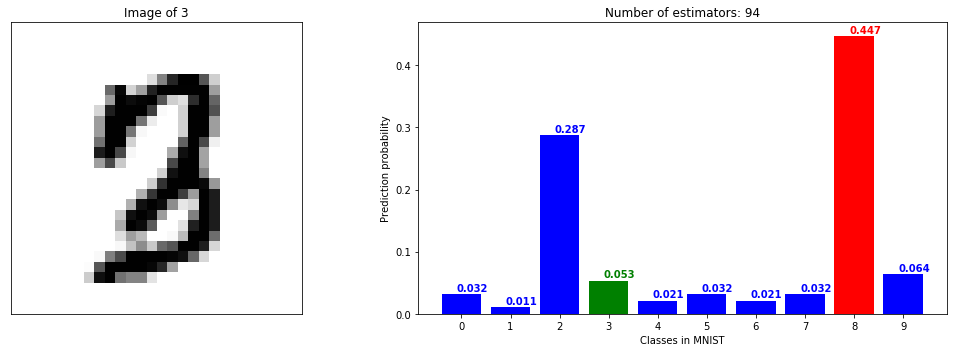

In [188]:
index = few_random_img_idx[4]
plot_img_uncertainty(misclassified_examples[index], 
                     misclass_ex_labels[index], uncertainties[index])

### 5.- Reproduce Figure one from the "Simple and Scalable Predictive UncertaintyEstimation using Deep Ensembles" paper (attached) using a random forest, computing regression uncertainty as the variance of the estimates across trees. The authors mention their metodology in Section 3.2, and one can easily reproduce the training set as its a sample of y = x^3 + noise, where noise is Gaussian with zero mean and 3^2 variance, and x is in the range [-4, 4]. The key idea of those figures is to show that uncertainty grows for values outside of the range [-4, 4], more specifically, in the range [-6, -4] and [4, 6]. To produce the figure, you can plot the mean and make confidence bands with size of square root of variance.Remember that I expect a good report of results, not just concentrating on the code, but also on scientific analysis of your results and explanations.

In [190]:
def artificial_dataset(ranges,size,noise_parameter):
    x=np.random.uniform(ranges[0],ranges[1],size)
    y=np.power(x,3)+np.random.normal(noise_parameter[0],noise_parameter[1],size)
    return x,y


In [191]:
#Training and test data generation 
size_train=10000
size_test=300
train_ranges=[-4,4]
test_ranges=[-6,6]
noise_parameter=[0,3**2]
x_train,y_train=artificial_dataset(train_ranges,size_train,noise_parameter)
x_test,_=artificial_dataset(test_ranges,size_test,noise_parameter)
x_test=np.sort(x_test)

In [192]:
# model training
number_ensemble = 100
# Fitting the Regression model to the dataset
regressor = RandomForestRegressor(n_estimators = number_ensemble, random_state = 0,verbose=0)
regressor.fit(x_train.reshape(-1,1),y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [193]:
#model testing
y_pred = regressor.predict(x_test.reshape(-1,1))


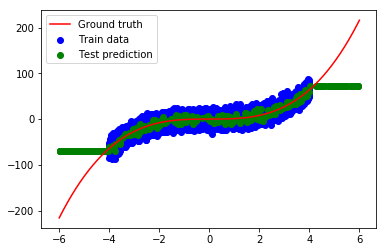

In [194]:
#plotting
x = np.linspace(-6,6,1000)
y = x**3
plt.plot(x,y, c = 'r')
plt.scatter(x_train,y_train,c = 'b')
plt.scatter(x_test,y_pred,c = 'g')
plt.legend(['Ground truth','Train data','Test prediction'], loc=0)
plt.show()

In [195]:
sd_list = []
mean_list = []
for data in x_test:
    predictions = []
    for tree_idx in range(number_ensemble):
        predictions.append(regressor.estimators_[tree_idx].predict(data)[0])
    variance = np.var(predictions)
    mean_list.append(np.mean(predictions))
    sd_list.append(variance**0.5)
    
mean_list = np.array(mean_list)
stds = np.array(sd_list)

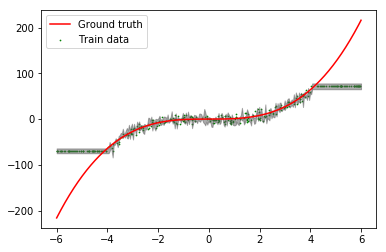

In [196]:
plt.figure()
plt.plot(x,y, c = 'r')
plt.scatter(x_test,y_pred,c = 'g',s=0.5)
plt.fill_between(np.linspace(-6,6,size_test),mean_list-stds, \
                 mean_list+stds, alpha=.5, color = '#595959', label = 'Uncertainty')
plt.legend(['Ground truth','Train data'], loc=0)
plt.show()